In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
movie = pd.read_csv("Movie.csv")
movie

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [25]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userId  8992 non-null   int64  
 1   movie   8992 non-null   object 
 2   rating  8992 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.9+ KB


# EDA

In [26]:
counts = movie["movie"].value_counts()
counts

movie
Toy Story (1995)                      2569
GoldenEye (1995)                      1548
Heat (1995)                           1260
Jumanji (1995)                        1155
Sabrina (1995)                         700
Grumpier Old Men (1995)                685
Father of the Bride Part II (1995)     657
Sudden Death (1995)                    202
Waiting to Exhale (1995)               138
Tom and Huck (1995)                     78
Name: count, dtype: int64

<BarContainer object of 10 artists>

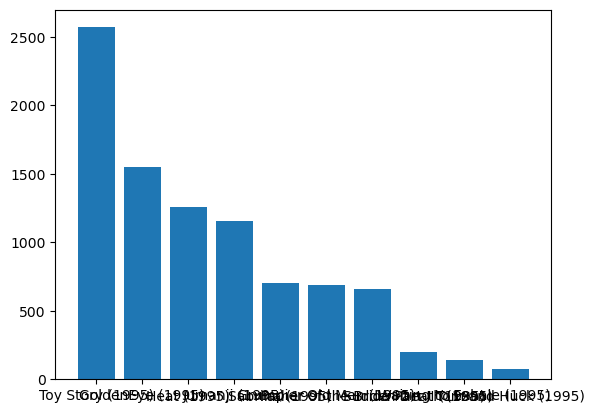

In [27]:
plt.bar(counts.index, counts.values)

In [28]:
movies_df = pd.read_csv("Movie.csv")
movies_df

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [29]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userId  8992 non-null   int64  
 1   movie   8992 non-null   object 
 2   rating  8992 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.9+ KB


                                movie  count
0                    Toy Story (1995)   2569
1                    GoldenEye (1995)   1548
2                         Heat (1995)   1260
3                      Jumanji (1995)   1155
4                      Sabrina (1995)    700
5             Grumpier Old Men (1995)    685
6  Father of the Bride Part II (1995)    657
7                 Sudden Death (1995)    202
8            Waiting to Exhale (1995)    138
9                 Tom and Huck (1995)     78


<Axes: xlabel='Movies', ylabel='counts'>

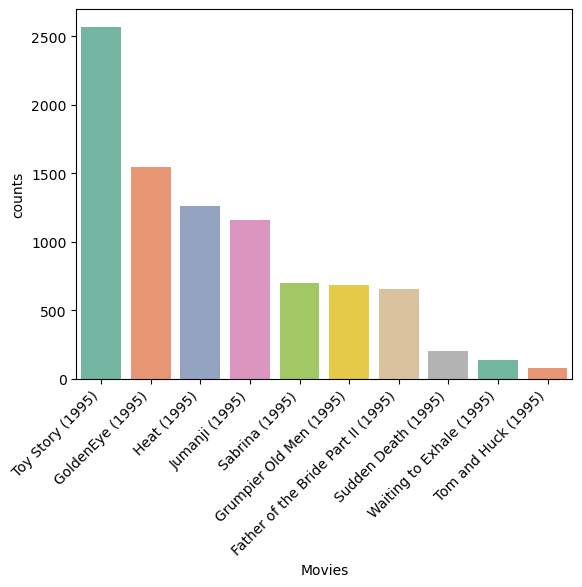

In [30]:
counts = movies_df['movie'].value_counts().reset_index()
print(counts)
columns =["movie", "counts"]
plt.xlabel("Movies")
plt.ylabel("counts")
plt.xticks(rotation=45, ha='right')
sns.barplot(data=counts,x="movie", y='count',hue = 'movie',palette="Set2")

In [31]:
print(movies_df.userId.unique())
len(movies_df.userId.unique())

[   3    6    8 ... 7080 7087 7105]


4081

In [32]:
movies_df.sort_values('userId')

,userId,movie,rating
2569,1,Jumanji (1995),3.5
3724,2,Grumpier Old Men (1995),4.0
0,3,Toy Story (1995),4.0
5204,4,Heat (1995),3.0
7444,4,GoldenEye (1995),4.0
...,...,...,...
6463,7117,Heat (1995),5.0
2567,7119,Toy Story (1995),5.0
2568,7120,Toy Story (1995),4.5
3723,7120,Jumanji (1995),4.0


# Transform the table

   rating  count
0     3.0   2736
1     4.0   2660
2     5.0   1394
3     3.5    679
4     2.0    542
5     4.5    374
6     2.5    277
7     1.0    212
8     1.5     61
9     0.5     57


<Axes: xlabel='Ratings', ylabel='Counts'>

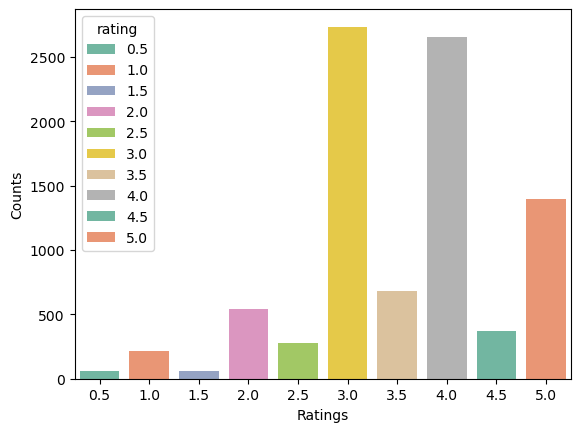

In [33]:
counts = movies_df['rating'].value_counts().reset_index()
print(counts)
counts.columns = ['rating', 'count']
plt.xlabel("Ratings")
plt.ylabel("Counts")
sns.barplot(data=counts,x='rating',hue='rating', y='count',palette='Set2')

In [34]:
user_movies_df = movies_df.pivot_table(index='userId',columns='movie',values='rating')
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [35]:
user_movies_df.fillna(0, inplace=True)
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [36]:
#calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
user_sim = 1-pairwise_distances(user_movies_df.values,metric='cosine')
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [37]:
user_sim.shape

(4081, 4081)

In [38]:
np.fill_diagonal(user_sim, 0)
user_sim

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 0.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 0.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 0.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        0.        ]])

In [39]:
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [40]:
movies_df.userId.unique()

array([   3,    6,    8, ..., 7080, 7087, 7105], dtype=int64)

In [41]:
# Set the index and column names to user ids
user_sim_df.index = movies_df.userId.unique()
user_sim_df.columns = movies_df.userId.unique()

In [42]:
user_sim_df.idxmax(axis=1)[0:50]

3        11
6       168
8        16
10     4047
11        3
12     6676
13     5953
14     4138
16        8
19     3603
22     3003
23     2096
24      539
31       66
34       93
39       53
47      258
53       39
54     2912
58        8
59     4154
66       31
69     1108
80      298
82        8
84      155
90     1024
91     1175
93       34
96      116
97     5826
99        8
105      39
107       8
109    3486
114    6093
115       8
116      96
117       8
124      31
126      31
129    5884
130    6203
131    3196
133    6676
134       8
135       8
136    5023
137     474
140    4980
dtype: int64

In [44]:
movies_df[(movies_df['userId']==6) | (movies_df['userId']==168)]

,userId,movie,rating
1,6,Toy Story (1995),5.0
60,168,Toy Story (1995),4.5
3725,6,Grumpier Old Men (1995),3.0
6464,6,Sabrina (1995),5.0


In [45]:
user_6=movies_df[movies_df['userId']==6]
user_168=movies_df[movies_df['userId']==168]
moview_watched_by_user168 = list(set(user_168.movie))
moview_watched_by_user6 = list(set(user_6.movie))
print(moview_watched_by_user168)
print(moview_watched_by_user6)

['Toy Story (1995)']
['Toy Story (1995)', 'Sabrina (1995)', 'Grumpier Old Men (1995)']


In [47]:
moview_watched_by_user168 = list(set(user_168.movie))
moview_watched_by_user6 = list(set(user_6.movie))
for movie_name in moview_watched_by_user6:
    if movie_name not in moview_watched_by_user168:
        print("recommendation : ", movie_name)

recommendation :  Sabrina (1995)
recommendation :  Grumpier Old Men (1995)
